# 02 - Let us first work on data for One-Month

In [4]:
# Converting the column Load_Interval to Numeric Type for Linearly Interpolating Later
dec['Load_Interval'] = pd.to_numeric(dec['Load_Interval'], errors='coerce')

In [5]:
# Define the sampling frequency (every 12th row - to get hourly data and reduce data size)
sampling_freq = 12
dec_downsampled = dec.iloc[::sampling_freq]

# Update the index values of dec_downsampled
dec_downsampled.reset_index(drop=True, inplace=True)

dec_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           717 non-null    object 
 1   Load_Cum       717 non-null    float64
 2   Load_Interval  717 non-null    float64
dtypes: float64(2), object(1)
memory usage: 16.9+ KB


# Let us also plot the specific parts of Load_Interval

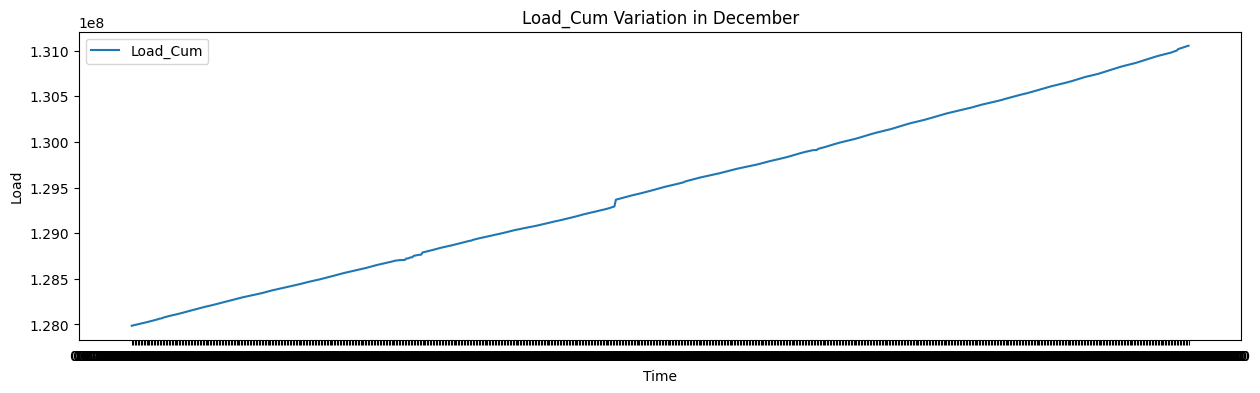

In [6]:
import matplotlib.pyplot as plt

# Create a plot with specified size
plt.figure(figsize=(15, 4))

# Plot Load_Cum
plt.plot(dec_downsampled['Time'], dec_downsampled['Load_Cum'], label='Load_Cum')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Load')
plt.title('Load_Cum Variation in December')
plt.legend()
plt.show()

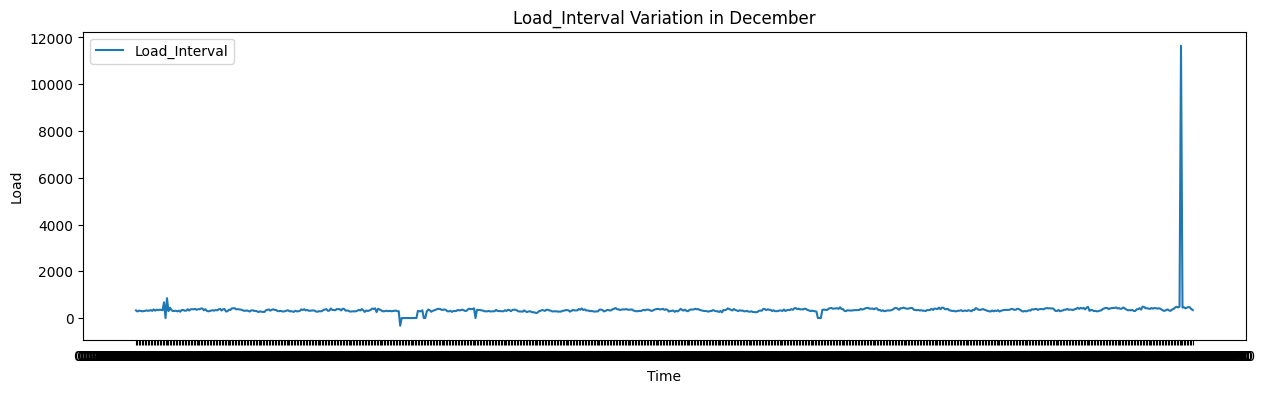

In [7]:
import matplotlib.pyplot as plt

# Create a plot with specified size
plt.figure(figsize=(15, 4))

# Plot Load_Interval
plt.plot(dec_downsampled['Time'], dec_downsampled['Load_Interval'], label='Load_Interval')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Load')
plt.title('Load_Interval Variation in December')
plt.legend()
plt.show()

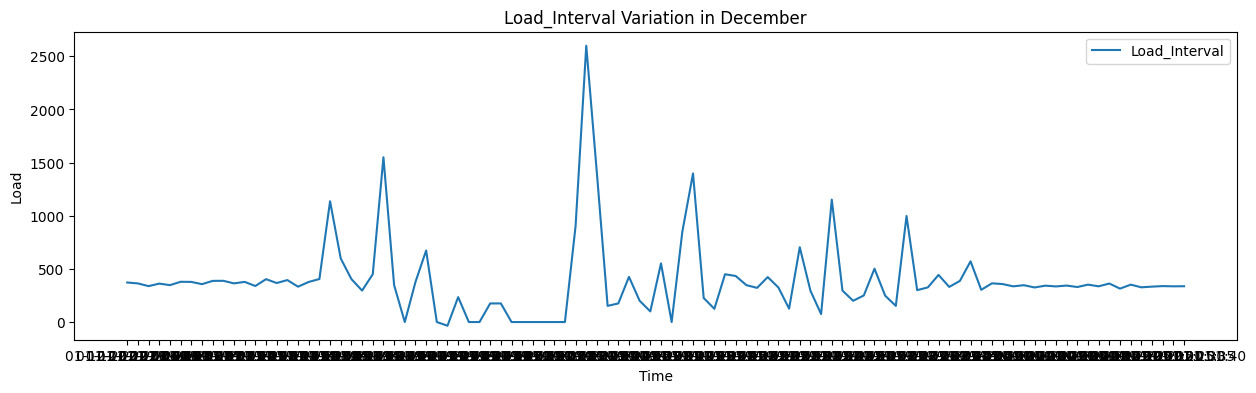

In [8]:
#  Range of dec: 0-8595  and Range of dec_downsampled: 0-715
dec4 = dec
dec4 = dec4.fillna(0)
dec5 = dec4.iloc[200:300]

# Create a plot with specified size
plt.figure(figsize=(15, 4))
# Plot Load_Interval for indices between 1000 to 2000
plt.plot(dec5['Time'], dec5['Load_Interval'], label='Load_Interval')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Load')
plt.title('Load_Interval Variation in December')
plt.legend()
plt.show()

In [9]:
# Find the number of zero values in the Load_Interval column of dec5
num_zeros = (dec5['Load_Interval'] == 0).sum()

print("Number of zero values in Load_Interval column:", num_zeros)

Number of zero values in Load_Interval column: 11


**Notable Observations:**
1. There are Null-Values present in Load_Interval
2. There are some very high (unrealistic) values in Load_Interval due to sudden jumps in Load_Cum

# 03 - Data Processing - Outliers/Missing/NaN/Zero Values

**Handling Null Values in Load_Interval:**

**1. Imputation:** Fill Null values with a specific value such as the mean, median, or mode of the column.

**2. Forward Fill:** Fill Null values with the last valid observation using the ffill() method.

**3. Backward Fill:** Fill Null values with the next valid observation using the bfill() method.

**4. Interpolation:** Interpolate Null values based on the values before and after using methods like linear 
interpolation (interpolate(method='linear')) or spline interpolation.

**Handling Unrealistic Values in Load_Interval due to Sudden Jumps in Load_Cum:**

**1. Outlier Detection:** Use statistical methods like z-score or IQR to detect and remove outliers in the 'Load_Interval' column.

**2. Thresholding:** Set a threshold for the maximum allowable value in 'Load_Interval' and replace any values exceeding this threshold with NaN or a predefined value.

**3. Moving Average:** Smooth out sudden jumps by applying a moving average to 'Load_Interval' over a specified window size.

**4. Percentage Change:** Calculate the percentage change between consecutive values in 'Load_Cum' and 'Load_Interval' columns and identify and handle any unusually large changes.


In [10]:
# Count the number of rows where 'Load_Interval' is equal to 0
num_zero_load_interval = (dec['Load_Interval'] == 0).sum()

# Print the result
print("Number of rows where Load_Interval is 0:", num_zero_load_interval)

Number of rows where Load_Interval is 0: 199


In [11]:
# Count the number of NaN values in the 'Load_Interval' column
num_nan_load_interval = dec['Load_Interval'].isna().sum()

# Print the result
print("Number of NaN values in Load_Interval column:", num_nan_load_interval)

Number of NaN values in Load_Interval column: 0


In [12]:
# Convert time to datetime object and set it as index
dec['Time'] = pd.to_datetime(dec['Time'], format='%d-%m-%Y %H:%M', utc=True)

# Set the datetime column as the index
# dec.set_index('Time', inplace=True)

In [13]:
# Find duplicate rows in the DataFrame
duplicate_rows = dec[dec.duplicated()]

# Print the duplicate rows
print("Duplicate Rows:",duplicate_rows)

Duplicate Rows: Empty DataFrame
Columns: [Time, Load_Cum, Load_Interval]
Index: []


# 3.1 - Using Linear Interpolation to fill in the Zero-Load Values

In [14]:
# Fill zero values in 'Load_Interval' column with NaN
dec_interpolated = dec

dec_interpolated['Load_Interval'].replace(0, pd.NA, inplace=True)

# Convert 'Load_Interval' column to numeric (float) type
dec_interpolated['Load_Interval'] = pd.to_numeric(dec_interpolated['Load_Interval'], errors='coerce')

In [15]:
# Interpolate NaN values in 'Load_Interval' column using linear interpolation
dec_interpolated['Load_Interval'] = dec_interpolated['Load_Interval'].interpolate(method='linear')

In [16]:
# Count the number of NaN values in each column of dec_interpolated
num_nan_values = dec_interpolated.isna().sum()

print("Number of NaN values in each column:\n", num_nan_values)

Number of NaN values in each column:
 Time             0
Load_Cum         0
Load_Interval    0
dtype: int64


<Axes: title={'center': 'Load_Interval Variation in December'}, xlabel='Time', ylabel='Load'>

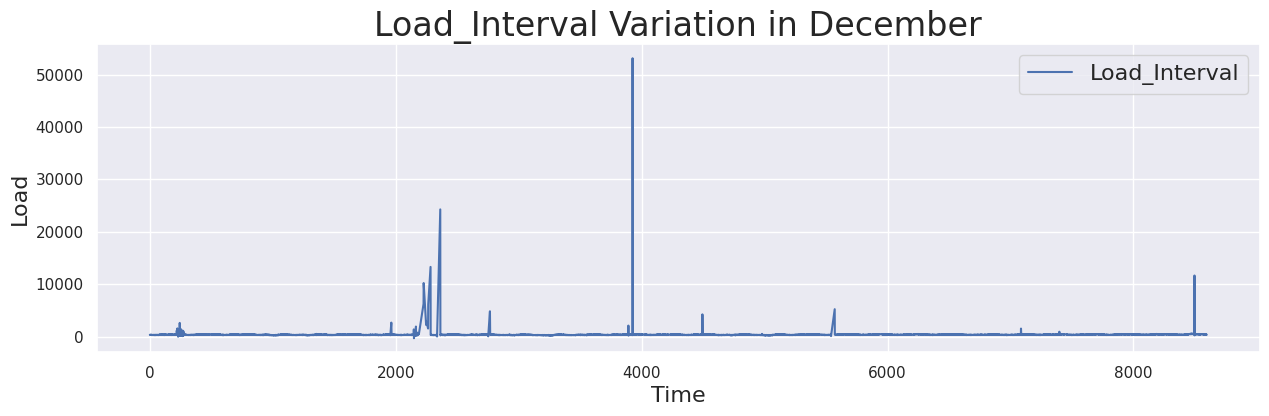

In [17]:
import seaborn as sns

# Define the plot_series function
def plot_series(df=None, column=None, series=pd.Series([]),
                label=None, ylabel=None, title=None, start=None, end=None):
    sns.set()
    fig, ax = plt.subplots(figsize=(15, 4))  # Adjust the size as needed
    ax.set_xlabel('Time', fontsize=16)
    if column:
        ax.plot(df.index[start:end], df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax

# Call the plot_series function with the appropriate arguments
plot_series(df = dec_interpolated, column='Load_Interval',
            label='Load_Interval', ylabel='Load',
            title='Load_Interval Variation in December')

Now, dec_interpolated is the dataframe containing No NAN values, No Zero Values for both the columns of Load_Cum and Load_Interval - done using **Linear Interpolation**.

# 3.2 - Detecting Outliers in the dataset

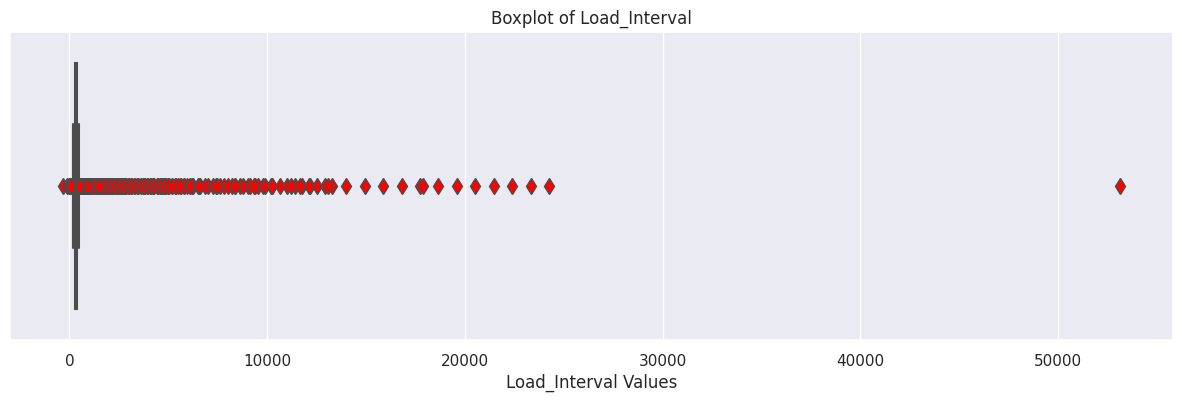

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for 'Load_Interval' column
plt.figure(figsize=(15, 4))

# Customize outlier color
sns.boxplot(x = dec_interpolated['Load_Interval'], flierprops=dict(markerfacecolor='red', markersize=8))

plt.title('Boxplot of Load_Interval')
plt.xlabel('Load_Interval Values')
plt.show()

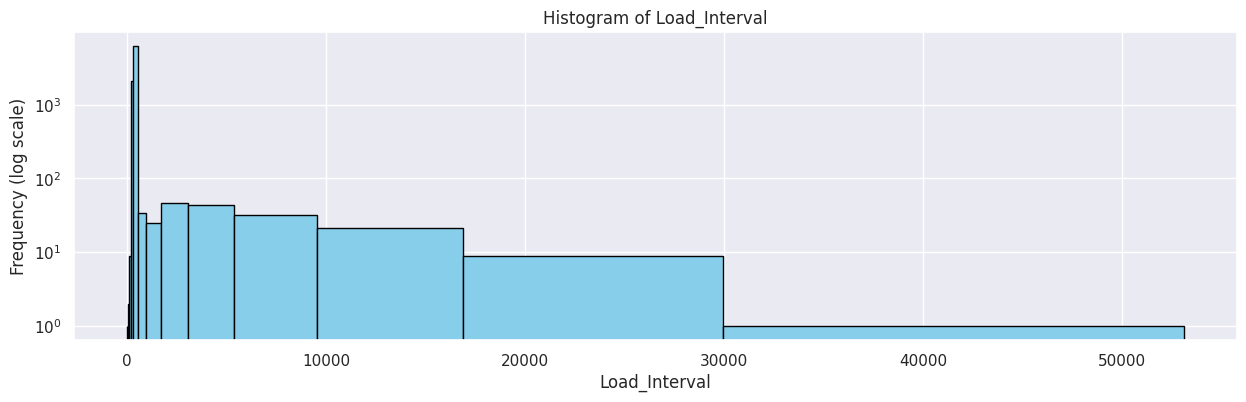

In [19]:
# Compute logarithmic y-axis bins
log_bins = np.logspace(np.log10(1), np.log10(dec_interpolated['Load_Interval'].max()), 20)

# Create the histogram plot with logarithmic y-axis
plt.figure(figsize=(15, 4))
plt.hist(dec_interpolated['Load_Interval'], bins=log_bins, color='skyblue', edgecolor='black')
plt.title('Histogram of Load_Interval')
plt.xlabel('Load_Interval')
plt.ylabel('Frequency (log scale)')
plt.yscale('log')  # Set y-axis scale to logarithmic
plt.show()

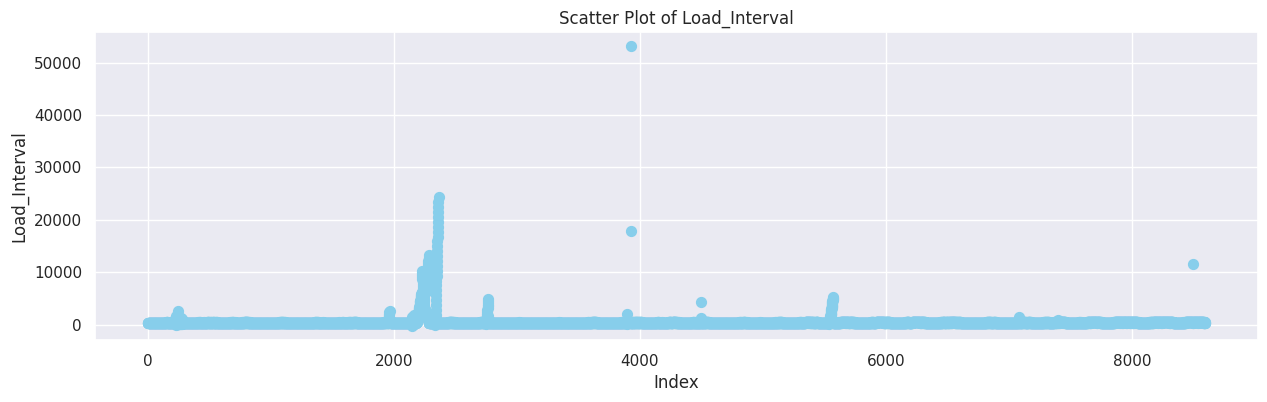

In [20]:
plt.figure(figsize=(15, 4))
plt.scatter(dec_interpolated.index,dec_interpolated['Load_Interval'], color='skyblue', s=50)
plt.title('Scatter Plot of Load_Interval')
plt.xlabel('Index')
plt.ylabel('Load_Interval')
plt.show()

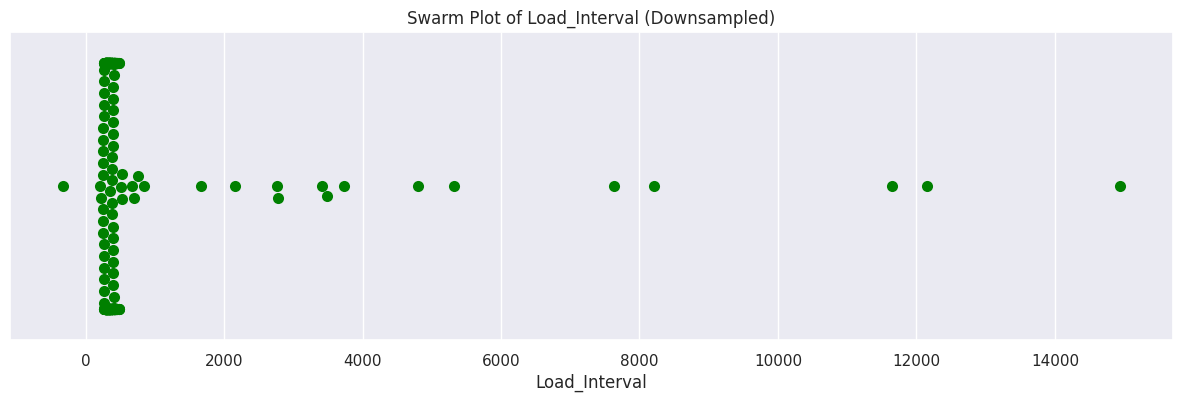

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the sampling frequency
sampling_freq = 12  

# Downsample the dec_interpolated DataFrame
dec_interpolated_downsampled = dec_interpolated.iloc[::sampling_freq]

# Create the swarm plot using the downsampled DataFrame
plt.figure(figsize=(15, 4))
sns.swarmplot(x=dec_interpolated_downsampled['Load_Interval'], color='green', size=8)
plt.title('Swarm Plot of Load_Interval (Downsampled)')
plt.xlabel('Load_Interval')
plt.tight_layout
plt.show()

# 3.3 - Removing Outliers in the dataset

In [22]:
# Standard Deviation Method
mean_load_interval = dec_interpolated['Load_Interval'].mean()
std_load_interval = dec_interpolated['Load_Interval'].std()

# Define threshold (e.g., 3 standard deviations)
threshold = 3

# Identify outliers
outliers_std = dec_interpolated[(dec_interpolated['Load_Interval'] - mean_load_interval).abs() > threshold * std_load_interval]

# Remove outliers
dec_no_outliers_std = dec_interpolated[(dec_interpolated['Load_Interval'] - mean_load_interval).abs() <= threshold * std_load_interval]

In [23]:
# Interquartile Range Method
# Calculate quartiles
Q1 = dec_interpolated['Load_Interval'].quantile(0.25)
Q3 = dec_interpolated['Load_Interval'].quantile(0.75)
IQR = Q3 - Q1

# Define threshold (e.g., 1.5 times IQR)
threshold = 1.5

# Identify outliers
outliers_iqr = dec_interpolated[(dec_interpolated['Load_Interval'] < (Q1 - threshold * IQR)) | (dec_interpolated['Load_Interval'] > (Q3 + threshold * IQR))]

# Remove outliers
dec_no_outliers_iqr = dec_interpolated[(dec_interpolated['Load_Interval'] >= (Q1 - threshold * IQR)) & (dec_interpolated['Load_Interval'] <= (Q3 + threshold * IQR))]

In [24]:
# Z-Score Method
from scipy.stats import zscore

# Calculate z-scores
z_scores = zscore(dec_interpolated['Load_Interval'])

# Define threshold (e.g., z-score of 3)
threshold = 3

# Identify outliers
outliers_z_score = dec_interpolated[(abs(z_scores) > threshold)]

# Remove outliers
dec_no_outliers_z_score = dec_interpolated[(abs(z_scores) <= threshold)]

In [25]:
# Percentile Method
# Define percentiles (e.g., remove bottom and top 5% of data points)
percentile_lower = dec_interpolated['Load_Interval'].quantile(0.05)
percentile_upper = dec_interpolated['Load_Interval'].quantile(0.95)

# Identify outliers
outliers_percentile = dec_interpolated[(dec_interpolated['Load_Interval'] < percentile_lower) | (dec_interpolated['Load_Interval'] > percentile_upper)]

# Remove outliers
dec_no_outliers_percentile = dec_interpolated[(dec_interpolated['Load_Interval'] >= percentile_lower) & (dec_interpolated['Load_Interval'] <= percentile_upper)]

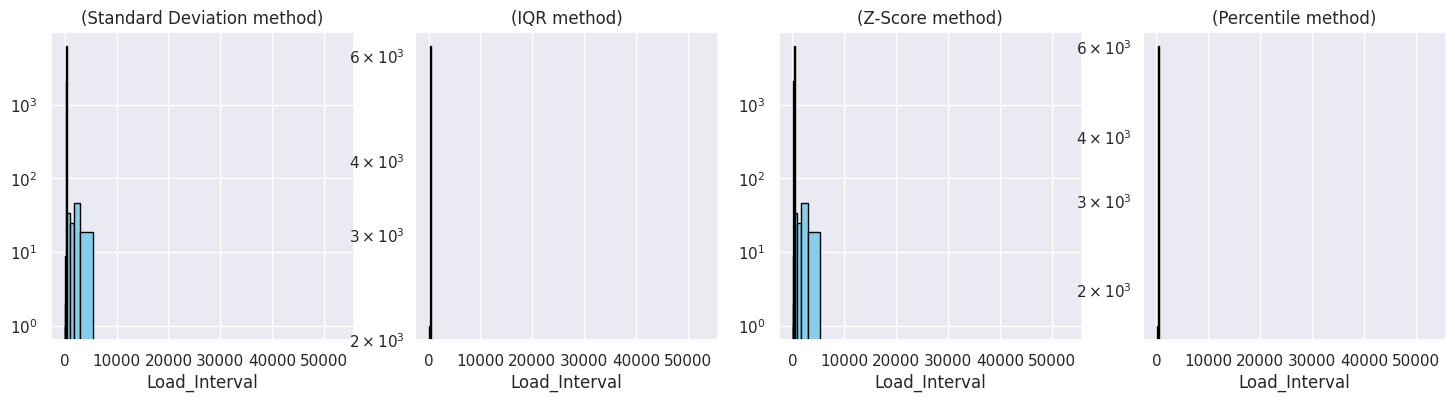

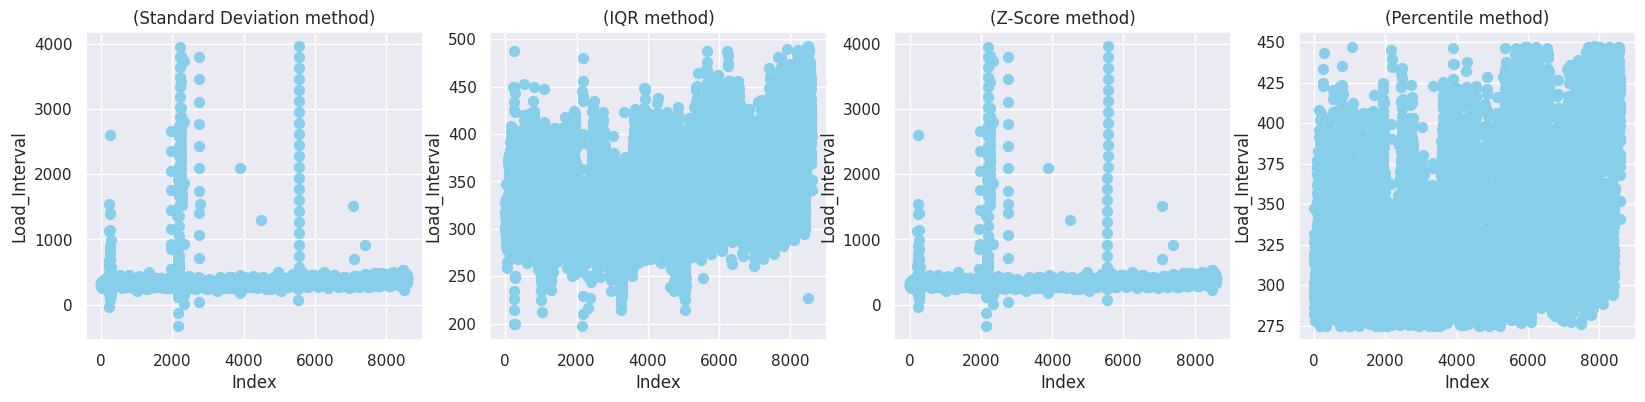

In [26]:
# Define function to create histograms and scatter plots
def create_plots(data):
    # Histogram
    plt.figure(figsize=(18, 4))
    for i, method in enumerate(data):
        plt.subplot(1, 4, i+1)
        plt.hist(data[method]['Load_Interval'], bins=log_bins, color='skyblue', edgecolor='black')
        plt.title(f'({method} method)')
        plt.xlabel('Load_Interval')
        plt.yscale('log')
    plt.show()
    
    print('\n\n')
    
    # Scatter Plot
    plt.figure(figsize=(20, 4))
    for i, method in enumerate(data):
        plt.subplot(1, 4, i+1)
        plt.scatter(data[method].index, data[method]['Load_Interval'], color='skyblue', s=50)
        plt.title(f'({method} method)')
        plt.xlabel('Index')
        plt.ylabel('Load_Interval')
    plt.tight_layout
    plt.show()

# Data for plotting
data_methods = {
    'Standard Deviation': dec_no_outliers_std,
    'IQR': dec_no_outliers_iqr,
    'Z-Score': dec_no_outliers_z_score,
    'Percentile': dec_no_outliers_percentile
}

# Plot histograms and scatter plots for each method
create_plots(data_methods)

As is evident from the figures, **Inter-Quartile Range** and **Percentile Based Methods** work best!

In [27]:
# dec_no_outliers_iqr and dec_no_outliers_percentile are the datasets with removed outliers on the dec_interpolated data

In [28]:
print(pd.infer_freq(dec_orig['Time']))

None


# 3.4 - Removing Outliers and Linearly Interpolating their values: IQR

In [29]:
dec3 = dec_interpolated
dec3['Time'] = pd.to_datetime(dec3['Time'], format='%d-%m-%Y %H:%M')
# dec3.set_index('Time', inplace=True)

# Remove outliers using IQR method
Q1 = dec3['Load_Interval'].quantile(0.25)
Q3 = dec3['Load_Interval'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with zero
dec3['Load_Interval'] = dec3['Load_Interval'].apply(lambda x: 0 if x < lower_bound or x > upper_bound else x)

# Replace Load_Interval values equal to 0 with linearly interpolated values
dec3['Load_Interval'] = dec3['Load_Interval'].replace(0, pd.NA).interpolate(method='linear')

# 3.5 - Removing Negatives and Linearly Interpolating them

In [30]:
num_negatives = (dec['Load_Interval'] < 0).sum()
print("Number of negative values in Load_Interval column:", num_negatives)

Number of negative values in Load_Interval column: 0


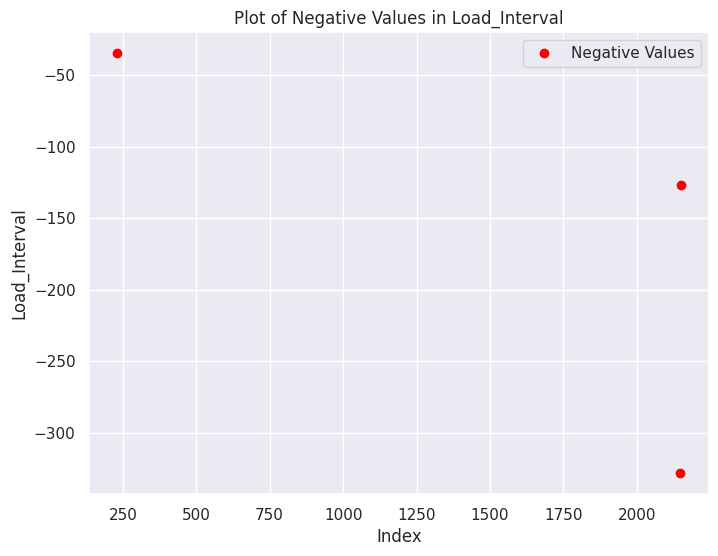


Rows with negative values in Load_Interval column:
                  Time      Load_Cum  Load_Interval
230   01-12-2021 19:30  1.280653e+08     -34.666667
2148  08-12-2021 11:45  1.287006e+08    -328.444444
2149  08-12-2021 11:50  1.287003e+08    -126.555556


In [31]:
import matplotlib.pyplot as plt

# Filter rows with negative values in Load_Interval column
negative_values = dec_orig[dec_orig['Load_Interval'] < 0]

# Plot the negative values
plt.figure(figsize=(8, 6))
plt.plot(negative_values.index, negative_values['Load_Interval'], marker='o', linestyle='', color='red', label='Negative Values')
plt.title('Plot of Negative Values in Load_Interval')
plt.xlabel('Index')
plt.ylabel('Load_Interval')
plt.legend()
plt.show()

# Display only the 'Time', 'Load_Cum', and 'Load_Interval' columns
print("\nRows with negative values in Load_Interval column:")
print(negative_values[['Time', 'Load_Cum', 'Load_Interval']])

In [32]:
# Store the indexes of rows with negative values
negative_indexes = negative_values.index.tolist()

# Replace negative values with NaN in a copy of the original dataframe
dec7 = dec_orig.copy()
dec7.loc[negative_indexes, 'Load_Interval'] = np.nan

# Linearly interpolate NaN values
dec7['Load_Interval'] = dec7['Load_Interval'].interpolate(method='linear')

# Print the stored rows after linear interpolation
print("Rows with negative values in Load_Interval column after interpolation:")
print(dec7.loc[negative_indexes, ['Time', 'Load_Cum', 'Load_Interval']])

Rows with negative values in Load_Interval column after interpolation:
                  Time      Load_Cum  Load_Interval
230   01-12-2021 19:30  1.280653e+08     117.333333
2148  08-12-2021 11:45  1.287006e+08     998.266667
2149  08-12-2021 11:50  1.287003e+08     631.533333


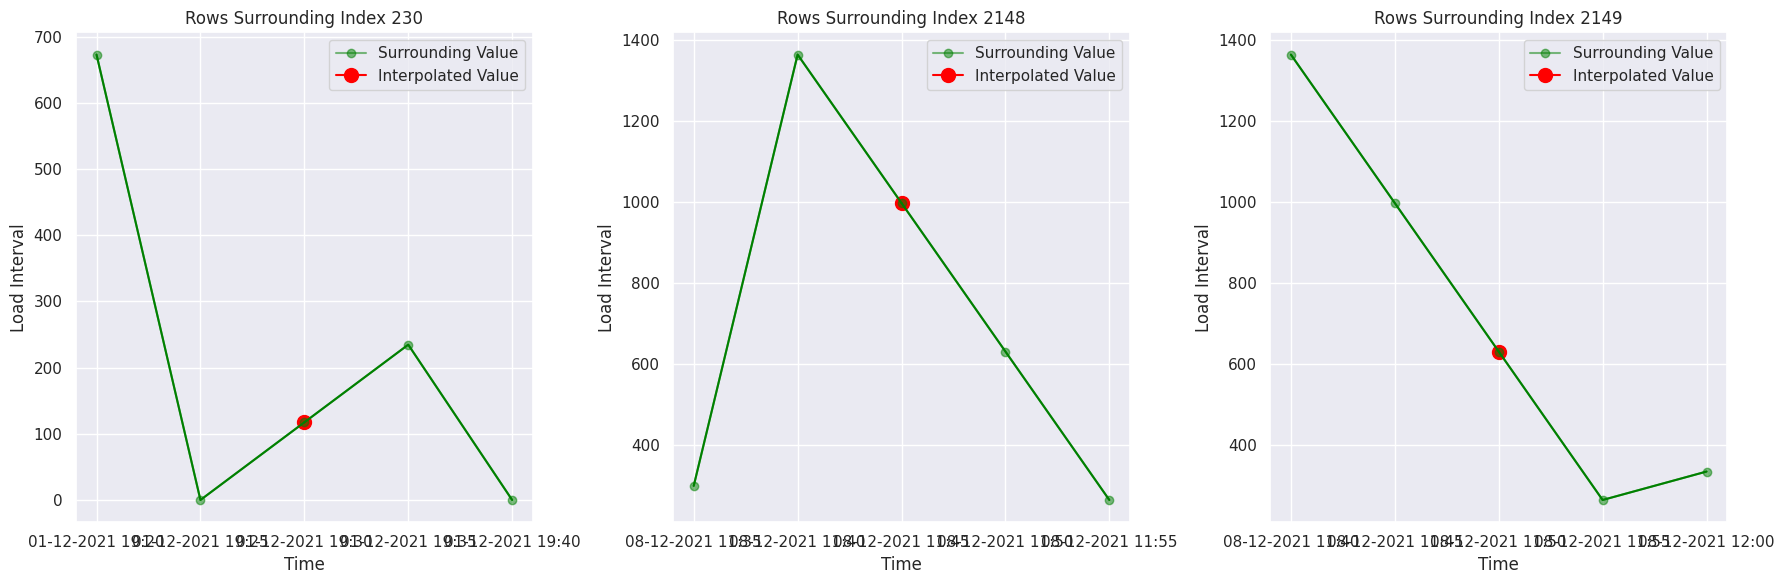

In [33]:
import matplotlib.pyplot as plt

# Function to plot rows above and below a given row
def plot_surrounding_rows(df, index):
    # Extract rows above and below the given index
    rows_above = df.iloc[index - 2:index+1]
    row = df.iloc[index:index+1]
    rows_below = df.iloc[index:index + 3]

    # Plot the rows above and below
    plt.plot(rows_above['Time'], rows_above['Load_Interval'], marker='o', linestyle='-', label='Surrounding Value', color='green', alpha=0.5)
    plt.plot(row['Time'], row['Load_Interval'], marker='o', markersize=10, linestyle='-', label='Interpolated Value', color='red', alpha=1)
    plt.plot(rows_below['Time'], rows_below['Load_Interval'], marker='o', linestyle='-', color='green', alpha=0.5)

    # Connect the points with lines
    plt.plot(rows_above['Time'], rows_above['Load_Interval'], linestyle='-', color='green')
    plt.plot(row['Time'], row['Load_Interval'], linestyle='-', color='red')
    plt.plot(rows_below['Time'], rows_below['Load_Interval'], linestyle='-', color='green')

    # Add labels and title
    plt.xlabel('Time')
    plt.ylabel('Load Interval')
    plt.title(f'Rows Surrounding Index {index}')
    plt.legend()

# Plot each row with surrounding rows horizontally
plt.figure(figsize=(18, 6))

for i, idx in enumerate(negative_indexes):
    plt.subplot(1, 3, i+1)
    plot_surrounding_rows(dec7, idx)
    plt.tight_layout()

plt.show()

# 3.6 - Plotting the Linearly Interpolated Modified Data

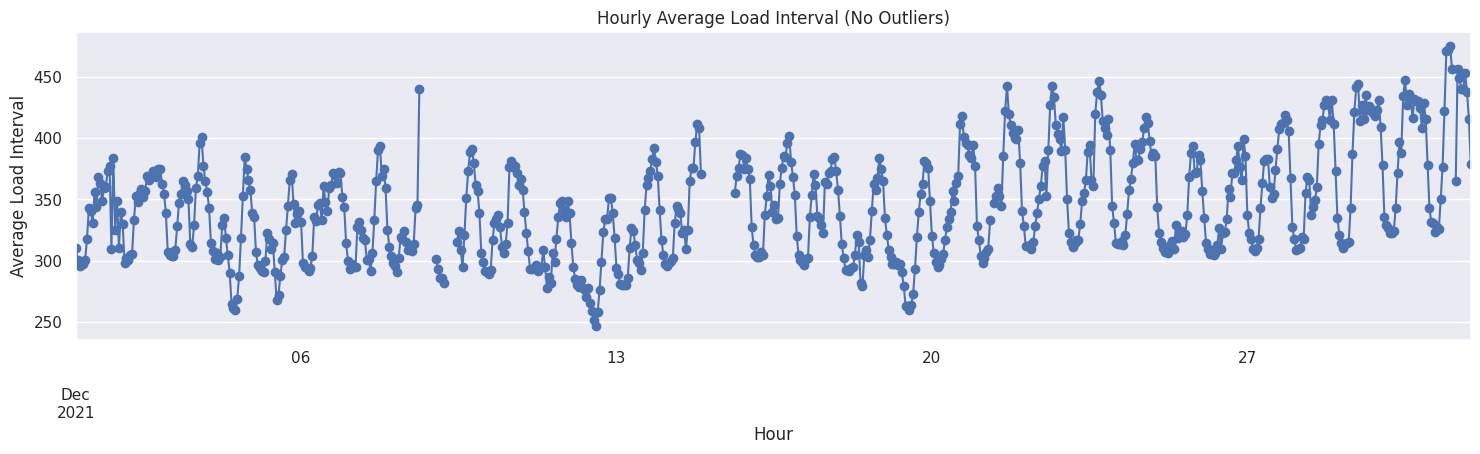

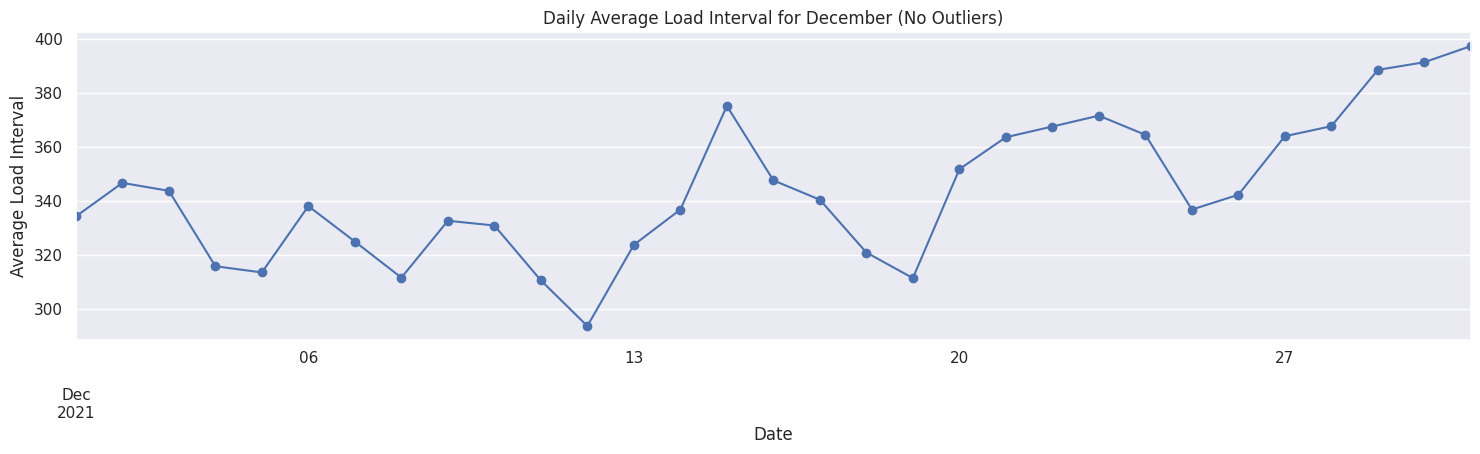

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

dec6 = dec3
dec6.set_index('Time', inplace=True)

# Resample the data to hourly frequency and calculate the mean load_interval for each hour
hourly_avg_load_no_outliers = dec6['Load_Interval'].resample('H').mean()

# Plot the hourly average load_interval (No Outliers)
plt.figure(figsize=(18, 4))
hourly_avg_load_no_outliers.plot(marker='o', linestyle='-')
plt.title('Hourly Average Load Interval (No Outliers)')
plt.xlabel('Hour')
plt.ylabel('Average Load Interval')
plt.grid(True)
plt.show()

# Resample the data to daily frequency and calculate the mean load_interval for each day
daily_avg_load_no_outliers = dec6['Load_Interval'].resample('D').mean()

# Plot the daily average load_interval for December (No Outliers)
plt.figure(figsize=(18, 4))
daily_avg_load_no_outliers.plot(marker='o', linestyle='-')
plt.title('Daily Average Load Interval for December (No Outliers)')
plt.xlabel('Date')
plt.ylabel('Average Load Interval')
plt.grid(True)
plt.show()